# Diabetes Case Study

## 1. Introduction
Brief case study demonstrating three supervised machine learning algorithms (Random Forest, AdaBoost, and Support Vector Machines). In addition, we apply randomized search on hyperparameters to improve the model. 

The problem framework is to predict the binary `Outcome`-variable indicating the diagnois of "diabetes" vs. "no diabetes". Our variables for prediction are `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, and `Age`. 

The used classifiers are from the sklearn library: 
- [Random forests](https://scikit-learn.org/stable/modules/ensemble.html#forest)
 - In particular, we will use the [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

- [AdaBoost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)
 - The classifier we will use: [AdaBoost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

- [Support vector machines](https://scikit-learn.org/stable/modules/svm.html)
 - Here we will use the [SVC()](https://scikit-learn.org/stable/modules/svm.html) class.
 
 
Furthermore, we will use [randomized search on hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). In contrast to `GridSearchCV()`, not all parameter values are tried out which leads to a faster implementation. In general, the differences between Grid search and randomized search are marginal when it comes to finding the best parameters, but randomized search is considerably faster.

In [1]:
# Time
from time import time
start_notebook = time()

# Import standard libraries
import pandas as pd
import numpy as np

# Import our favourite scores and functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Import algorithm classes
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

# Import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

# plotting in notebook
%matplotlib inline

C:\Users\TM\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 2. Dataset

#### Notes on data

Using the csv file should be the easiest way to import the data. However, there are other options, for example:
- Use [load_diabetes()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) from `sklearn.datasets`.
 - Information about the [data](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) from `sklearn.datasets` package.
- Load data from original source: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [2]:
# Read in our dataset (either direct or indirect)
df = pd.read_csv("data/data_diabetes.csv") 

# Take a look at the first rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Note** that the labeling may differ depending on the source of data import.

In [3]:
# Shape
print("Shape of data: ", df.shape)

# Descriptive statistics
df.describe()

Shape of data:  (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualizations

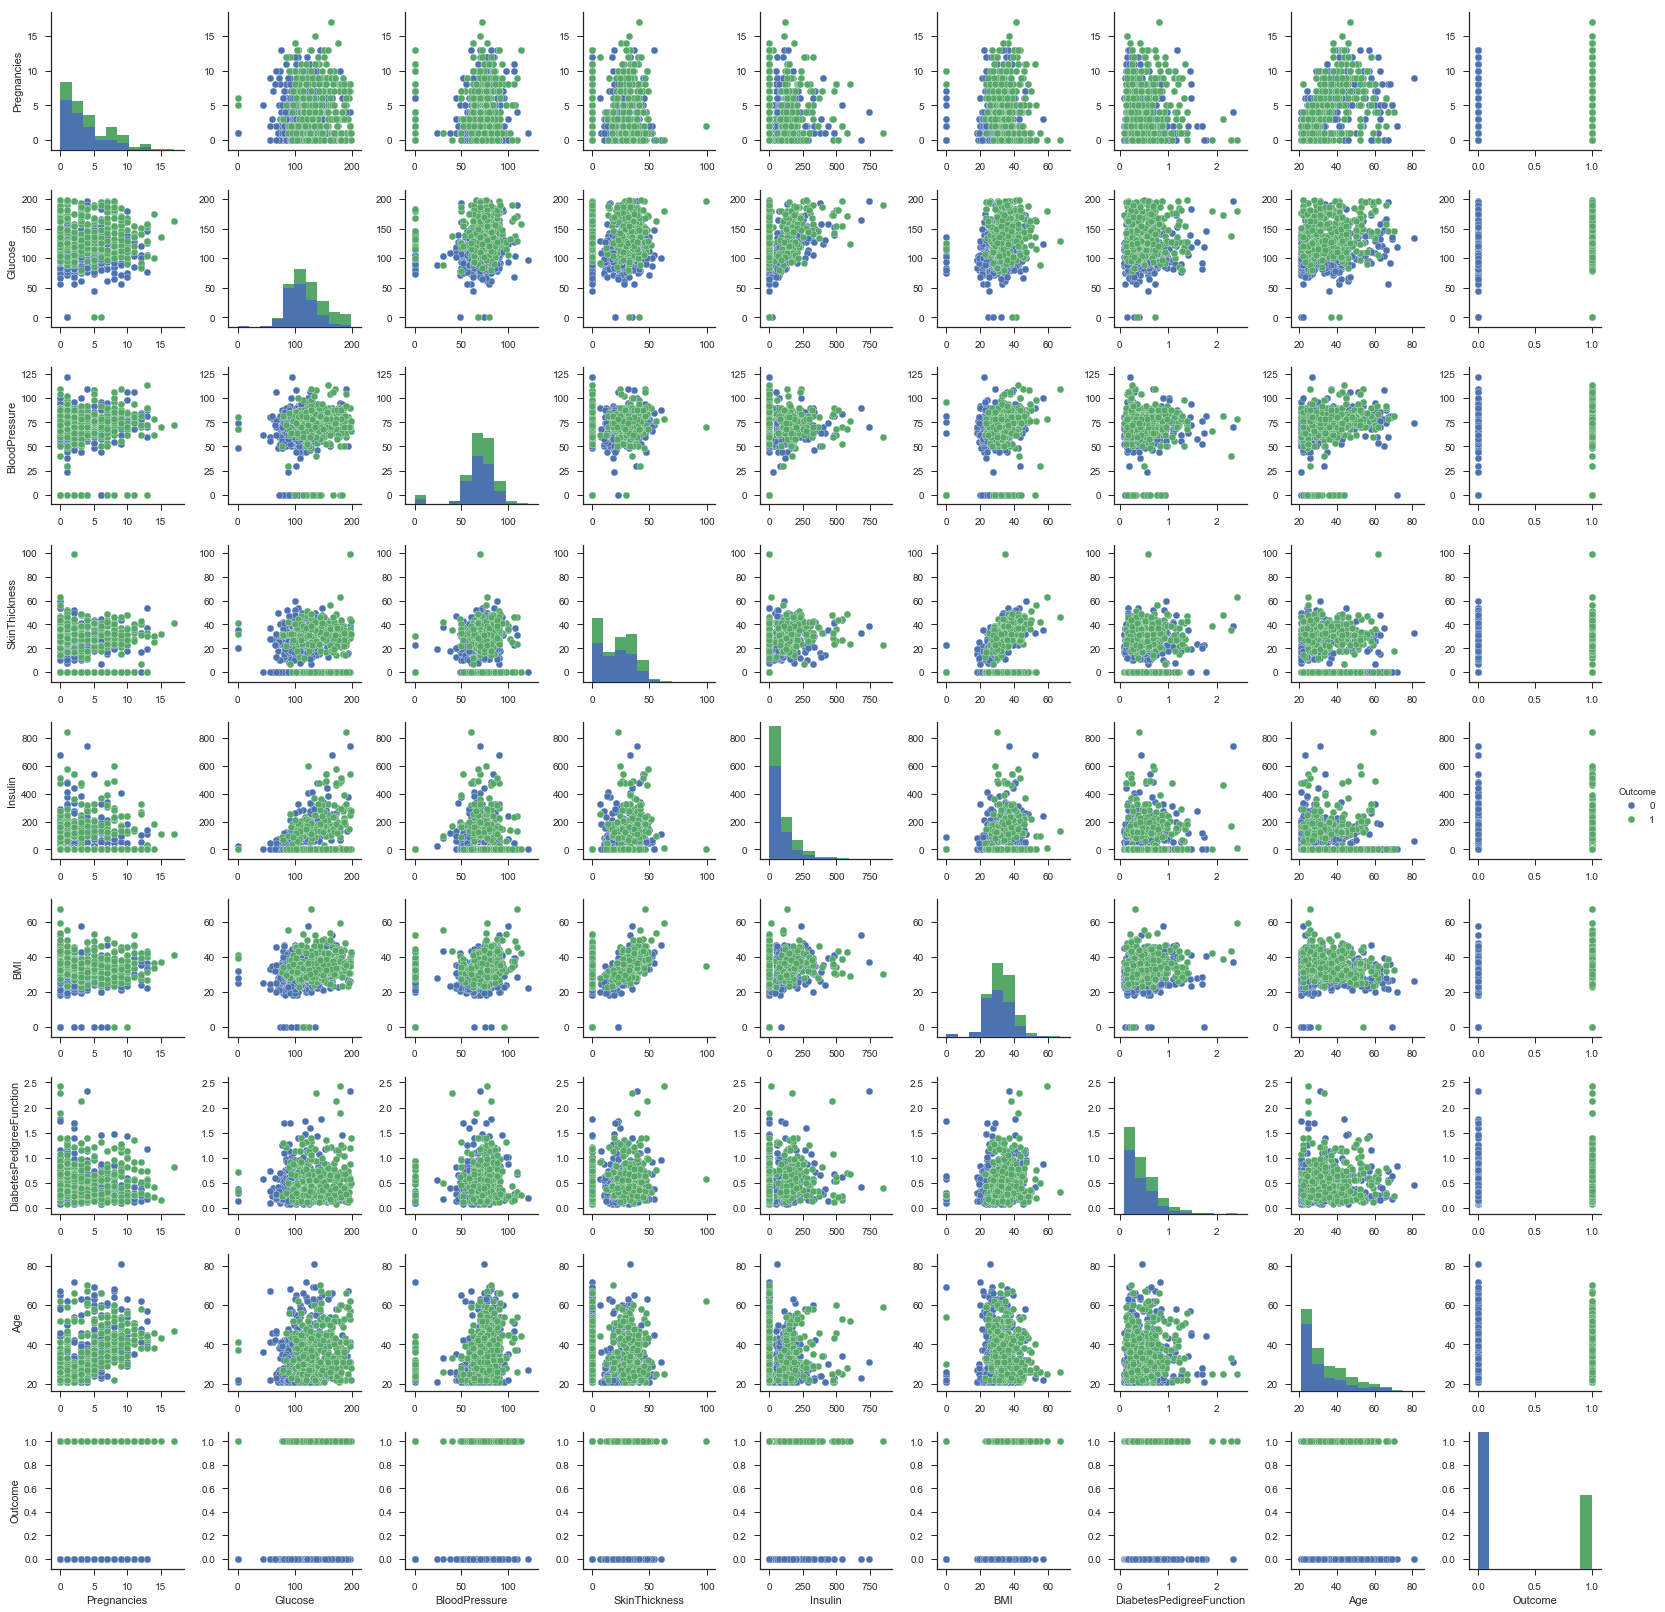

In [4]:
# pairplot
sns.pairplot(df, hue="Outcome");

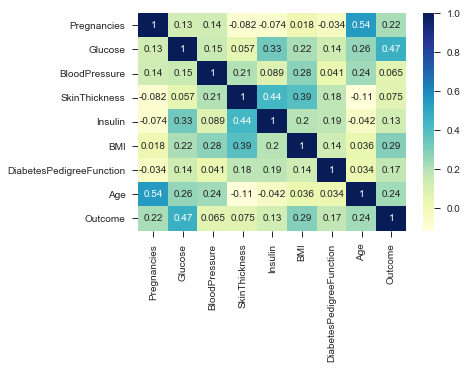

In [5]:
# Create heatmap of correlations
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu");

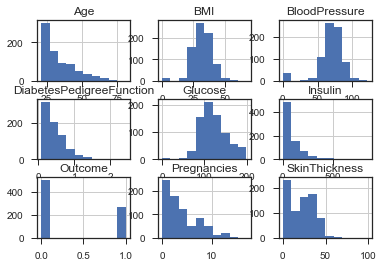

In [6]:
# histogram of variables
df.hist();

In [7]:
# Sum of missing data points
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Notes:**
This is a preprocessed dataset so we don't have to deal with missing values and can focus on model training and evaluation...

We will now jump right into the ML part with the goal to predict cases of diabetes (`Outcome: 1`).

**Next steps:** 

- Identify y vector and X matrix.
- Split datset into training and testing data (randomized order).

In [8]:
# Identify y and X
y = df["Outcome"]
X = df[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Show head of X_train
X_train.iloc[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [10]:
# Show head of y_train
y_train.iloc[0:5]

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

## 3. Modeling

#### Next steps for each algorithm:  
- Initialize classifier
- Hyperparameter tuning using randomized search
- Fit model object to training using previously found hyperparameters
- Make predictions using the `.best_estimator_.` method of the object from `RandomizedSearchCV()`. This gives us the estimator found from hyperparameter tuning.  

#### Random Forest Classifier

In [11]:
# Initialize classifier object
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Randomized search over hyperparameters with rf classifier
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

# Print scores for random forest
print("Accuracy: ",accuracy_score(rf_preds, y_test).round(4))
print("Recall: ", recall_score(rf_preds, y_test).round(4))
print("Precision: ", precision_score(rf_preds, y_test).round(4))
print("F1: ", f1_score(rf_preds, y_test).round(4))

Accuracy:  0.7727
Recall:  0.6724
Precision:  0.7091
F1:  0.6903


#### AdaBoost Classifier

In [12]:
# ada boost classifier
clf_ada = AdaBoostClassifier()

# set up hyperparameter search 
param_ada = {"learning_rate": [0.01, 0.02, 0.1,0.25, 0.5, 1, 2, 5],
            "n_estimators": [10, 100, 200, 400]}

# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_ada)

# Fit the model on the training data
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

# Print scores
print("Accuracy: ",accuracy_score(ada_preds, y_test).round(4))
print("Recall: ", recall_score(ada_preds, y_test).round(4))
print("Precision: ", precision_score(ada_preds, y_test).round(4))
print("F1: ", f1_score(ada_preds, y_test).round(4))

Accuracy:  0.7662
Recall:  0.6792
Precision:  0.6545
F1:  0.6667


#### Support Vector Machines
- We will use the [SVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class, namely C-Support Vector Classification.

In [13]:
# Classifier
clf_svc = SVC()

# Set up hyperparameter search
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

param_dist = {"C": [0.1, 0.5, 1, 3, 5],
             "kernel": ["linear", "rbf"]}

# Run randomized search over the hyperparameters
svc_search = RandomizedSearchCV(clf_svc, param_distributions=param_dist)

# Fit the model on the training dat
svc_search.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = svc_search.best_estimator_.predict(X_test)

# Print Scores
print("Accuracy: ",accuracy_score(svc_preds, y_test).round(4))
print("Recall: ", recall_score(svc_preds, y_test).round(4))
print("Precision: ", precision_score(svc_preds, y_test).round(4))
print("F1: ", f1_score(svc_preds, y_test).round(4))

Accuracy:  0.7532
Recall:  0.6545
Precision:  0.6545
F1:  0.6545


## 4. Feature Importance
With these models, interpretation is not as straightforward as for example in linear regression models where we can simply take a look at the individual coefficients of our independent variables to study their effect on the dependent variable.

However, there are other ways to interpret the results from machine learning models (for more information check this [book](https://christophm.github.io/interpretable-ml-book/)). One common way is to extract feature importances of the variables. The `RandomizedSearchCV` class gave us an object called `best_estimator_.` from randomized search. This object is asociated to a method to get the feature importances. We can access it by using `best_estimator_.feature_importances_` yielding weights of relative importances for each variable. Sklearn calculates the relative importances using a method called "gini importance" or "mean decrease impurity" described in [1]. For a short explanation consult this [link](https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3).

In the next step, we are going to find the important features (or variables with the most explanatory power) to determine whether an individual has diabetes or not.

[1]: Breiman, Friedman, "Classification and regression trees", 1984.

#### Feature Importance Random Forest

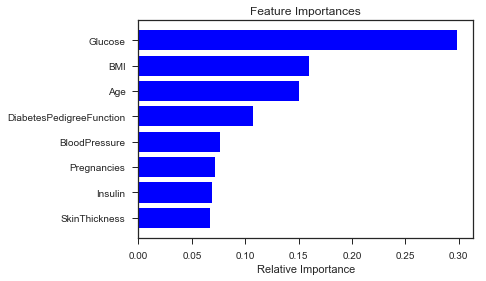

In [14]:
# Feature names
features = df.columns[:df.shape[1]]

# Apply feature importance method to rf
importances = random_search.best_estimator_.feature_importances_

# Sort by relative importances
indices = np.argsort(importances)

# Plot the relative feature importances
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

## 5. Summary and Conclusion

In this short case study we had a look at three supervised machine learning algorithms to predict whether an individual has diabetes using a dataset of 768 patients. 

There was a reasonable amount of class imbalance with just under 35% of patients having diabetes. There were no missing data, and initial exploration showed that it would be difficult to linearly separate patients with diabetes from those that do not have diabetes. We did not see any clear margins to separate the two classes from initial pairplots. Accordingly, nonlinear techniques seemed to be a promising approach in this setup.  

Three algorithms were used to predict whether or not a patient has diabetes. The most promising in terms of `F1-Score` appeared to be the random forest algorithm, resulting in the following metrics:

Accuracy:  0.7727  
Recall:  0.6852  
Precision:  0.6727  
F1:  0.6789

Moreover, the factors with the most explanatory power to determine whether an individual has diabetes or not seems to be `Glucose`, `BMI` and `Age` (based on random forest again). Another finding was the apparent strong interaction between `Pregnancies`and diabetes.

In [15]:
end_notebook = time()
time_notebook = end_notebook - start_notebook
print("Total running time of the script:", round(time_notebook,2))

Total running time of the script: 143.88
